<h1> CS 595 - Interactive Machine Learning </h1>
<h2> Data 3 -Transparency of Logistic Regression</h2>
<h2>Rohan Digambar Gawade.</h2>
<h2>A20379951</h2>


<h1><b>DataSet: Bank Direct Marketing DataSet</b></h1>
<h2>Description:</h2> The dataset contains the clients information collected through campaign by portueguese bank institution, so that we would know which clients the bank should target so that the clients will subscribe to the long term deposit scheme  of the bank.
<br>
The dataset consist of 20 attributes and one class label which is the binary valued attribute indicating whether the client has subscribe the scheme or not.
<br>
The dataset has around 41188 records. 
<h2>Features :
Clients Data</h2>
1 - age (numeric)<br>
2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")<br>
3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)<br>
4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")<br>
5 - default: has credit in default? (categorical: "no","yes","unknown")<br>
6 - housing: has housing loan? (categorical: "no","yes","unknown")<br>
7 - loan: has personal loan? (categorical: "no","yes","unknown")
<h2>Features related to the last contact of the current campaign</h2>
8 - contact: contact communication type (categorical: "cellular","telephone")<br> 
9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")<br>
11 - duration: last contact duration, in seconds (numeric).
<h2>Other Features</h2>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
<h2>Social and economic context attributes</h2>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)     <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     <br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)
<h2>Output variable (desired target):</h2>
21 - y - has the client subscribed a term deposit? (binary: "yes","no")<br>
<b>Dataset source:</b> http://archive.ics.uci.edu/ml/datasets/Bank+Marketing <br>
<b>Citation:</b> S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import Image 
import pydotplus 
from sklearn import metrics
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import math

In [3]:
# IMPORTING DATASET
df_bank_addi = pd.read_csv("bank-additional-full.csv",";")

In [4]:
df_bank_addi.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Removing the missing rows filled with unknown values

df_bank_addi = df_bank_addi[df_bank_addi.contact != 'unknown'] 
df_bank_addi = df_bank_addi[df_bank_addi.job != 'unknown'] 
df_bank_addi = df_bank_addi[df_bank_addi.marital != 'unknown']
df_bank_addi = df_bank_addi[df_bank_addi.education != 'unknown']
df_bank_addi = df_bank_addi[df_bank_addi.default != 'unknown']
df_bank_addi = df_bank_addi[df_bank_addi.housing != 'unknown']
df_bank_addi = df_bank_addi[df_bank_addi.loan != 'unknown']
df_bank_addi = df_bank_addi[df_bank_addi.month != 'unknown']
df_bank_addi = df_bank_addi[df_bank_addi.day_of_week != 'unknown']

In [6]:
#Down Sampling majority class to 3859
df_majority = df_bank_addi[df_bank_addi.y == 'no']
df_minority = df_bank_addi[df_bank_addi.y == 'yes']

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=3859,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_bank = pd.concat([df_majority_downsampled, df_minority])
df_bank.head()
# Display new class counts
df_bank.y.value_counts()

yes    3859
no     3859
Name: y, dtype: int64

In [7]:
transform_list=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
df_bank = pd.get_dummies(df_bank,columns=transform_list,prefix=transform_list)

In [8]:
df_bank.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
34393,39,365,6,999,1,-1.8,92.893,-46.2,1.266,5099.1,...,0,0,0,0,1,0,0,1,0,0
8600,49,85,3,999,0,1.4,94.465,-41.8,4.864,5228.1,...,0,0,0,0,0,0,1,0,1,0
33600,34,101,2,999,1,-1.8,92.893,-46.2,1.291,5099.1,...,0,0,0,0,0,1,0,1,0,0
20641,44,57,2,999,0,1.4,93.444,-36.1,4.965,5228.1,...,0,0,0,0,0,0,1,0,1,0
19612,39,436,2,999,0,1.4,93.444,-36.1,4.968,5228.1,...,0,0,0,0,1,0,0,0,1,0


In [9]:
#Ordering Features
colslist = list(df_bank.columns.values) 
colslist.pop(colslist.index('y')) 
df_bank = df_bank[colslist+['y']]

#Get List of Features
features = list(df_bank.columns[:-1])
#Target
target = df_bank.columns[-1]

X = df_bank[features]
Y = df_bank[target]

#Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

<h1>Section 4</h1>

In [10]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33, random_state = 0)

In [11]:
# function for calulating top features
def find_FeaturesL2L1(X_T,y_T,penaltyparam):
    clf = LogisticRegression(penalty = penaltyparam)
    clf.fit(X_T,y_T)
    top_features = 10
    coefficients = clf.coef_[0]
    top10index = abs(coefficients).argsort()[-10:][::-1]
    for index in top10index:
        print(features[index],"\t\t",coefficients[index])
        
        
def decisionTreeGraph(X_T,y_T,X_Ts,y_Ts):
    #Decision Tree Classifier
    dt_estimator = DecisionTreeClassifier(max_depth=6,min_impurity_decrease=0.005)
    #fit the data
    dt_estimator.fit(X_T,y_T)
    #Predict
    Y_pred = dt_estimator.predict(X_Ts)
    label = ['no','yes']
    dot_data = tree.export_graphviz(dt_estimator, out_file=None, 
                         feature_names=features,  
                         class_names=label,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data)
    return graph
    #Image(graph.create_png())

<h1> Important Features Section without z-score scaling</h1>

<h3> L2 Regularization</h3>

In [12]:
find_FeaturesL2L1(X_train,y_train,'l2')

emp.var.rate 		 -1.60995609873
month_mar 		 1.58394417196
euribor3m 		 1.23574891713
cons.price.idx 		 0.870832960084
month_nov 		 -0.828057108258
month_may 		 -0.803005889038
month_aug 		 0.646153293177
month_sep 		 -0.548484382722
job_retired 		 0.529814142556
month_jun 		 -0.435648259656


In [13]:
find_FeaturesL2L1(X_train,y_train,'l2')

emp.var.rate 		 -1.60995609873
month_mar 		 1.58394417196
euribor3m 		 1.23574891713
cons.price.idx 		 0.870832960084
month_nov 		 -0.828057108258
month_may 		 -0.803005889038
month_aug 		 0.646153293177
month_sep 		 -0.548484382722
job_retired 		 0.529814142556
month_jun 		 -0.435648259656


<h3> L1 Regularization</h3>

In [14]:
find_FeaturesL2L1(X_train,y_train,'l1')

month_mar 		 1.54038516795
emp.var.rate 		 -1.07092588108
month_may 		 -0.998707904582
month_nov 		 -0.686246166674
job_retired 		 0.575250007011
poutcome_failure 		 -0.547162655513
euribor3m 		 0.545278321636
cons.price.idx 		 0.541268915754
month_sep 		 -0.410932850406
job_housemaid 		 0.381068335717


In [15]:
find_FeaturesL2L1(X_train,y_train,'l1')

month_mar 		 1.56832683472
month_may 		 -0.989322027555
emp.var.rate 		 -0.964839674693
month_nov 		 -0.603673825236
job_retired 		 0.573934190476
poutcome_failure 		 -0.561415116545
cons.price.idx 		 0.478705661992
euribor3m 		 0.410187961482
job_housemaid 		 0.379782996442
month_oct 		 0.344413723915


<h2> Decision Tree Classifier</h2>

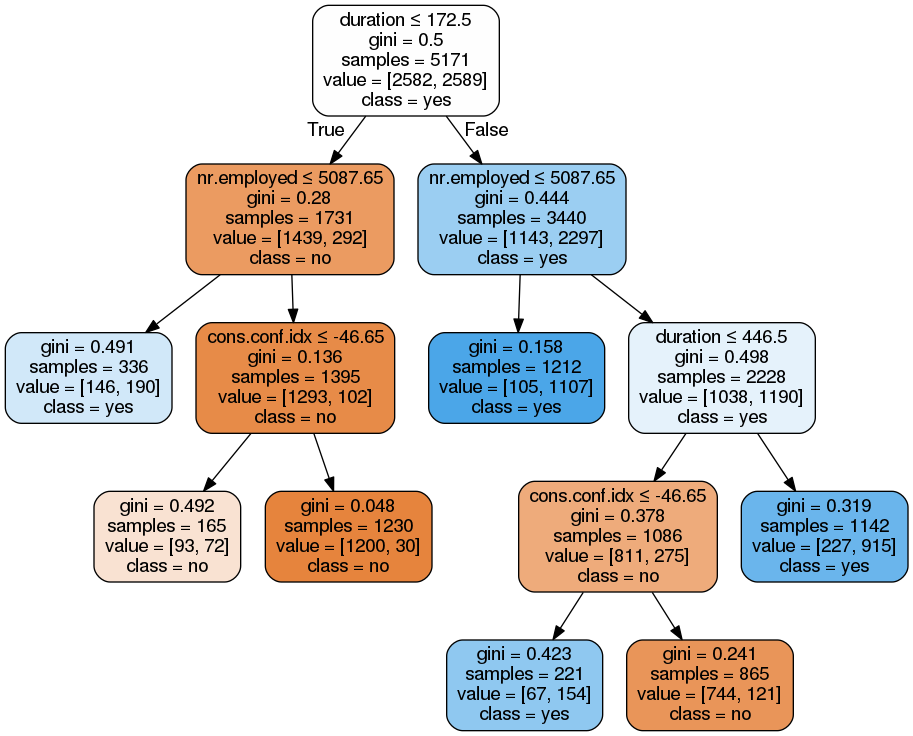

In [16]:
graph = decisionTreeGraph(X_train,y_train,X_test,y_test)
Image(graph.create_png())

<h2> Discussion</h2>

<ul>
<li>l2 Regularization provides the consistent top 10 features unlike l1 Regularization
<li>l1 Regularization on training set with z-score scaling takes more time to run.
<li>Only 7 of the top 10 features are common between l2 and l1 regularization
<b>emp.var.rate, month_mar, euribor3m, cons.price.idx, month_nov, month_may, month_sep</b>
<li>The decision tree classifier takes <b>duration</b> as most important feature and uses it as split. Then <b>nr.employed</b>, <b>cons.conf.idx</b>
</ul>

<h2> Important Features section using z-score scaling</h2>

In [17]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_S = sc_X.fit_transform(X)

In [18]:
# #Train test split
from sklearn.model_selection import train_test_split
X_trainS,X_testS,y_train,y_test = train_test_split(X_S,Y,test_size = 0.33, random_state = 0)

<h3> L2 Regularization</h3>

In [19]:
find_FeaturesL2L1(X_trainS,y_train,'l2')

emp.var.rate 		 -3.2572287167
duration 		 2.37321405831
euribor3m 		 1.23580171698
cons.price.idx 		 1.22491374595
month_mar 		 0.39189631481
pdays 		 -0.370511832965
month_aug 		 0.320939575889
month_may 		 -0.277381560494
month_jun 		 -0.222023182268
previous 		 -0.171889077087


<h3> L1 Regularization</h3>

In [20]:
find_FeaturesL2L1(X_trainS,y_train,'l1')

emp.var.rate 		 -3.69332250072
duration 		 2.38863363196
cons.price.idx 		 1.42591648423
euribor3m 		 1.39118522165
month_mar 		 0.378303469175
pdays 		 -0.363681442926
month_may 		 -0.324558401044
month_jun 		 -0.316712928162
month_aug 		 0.310181442618
contact_cellular 		 0.232546881602


<h3> Decision Tree classifier</h3>

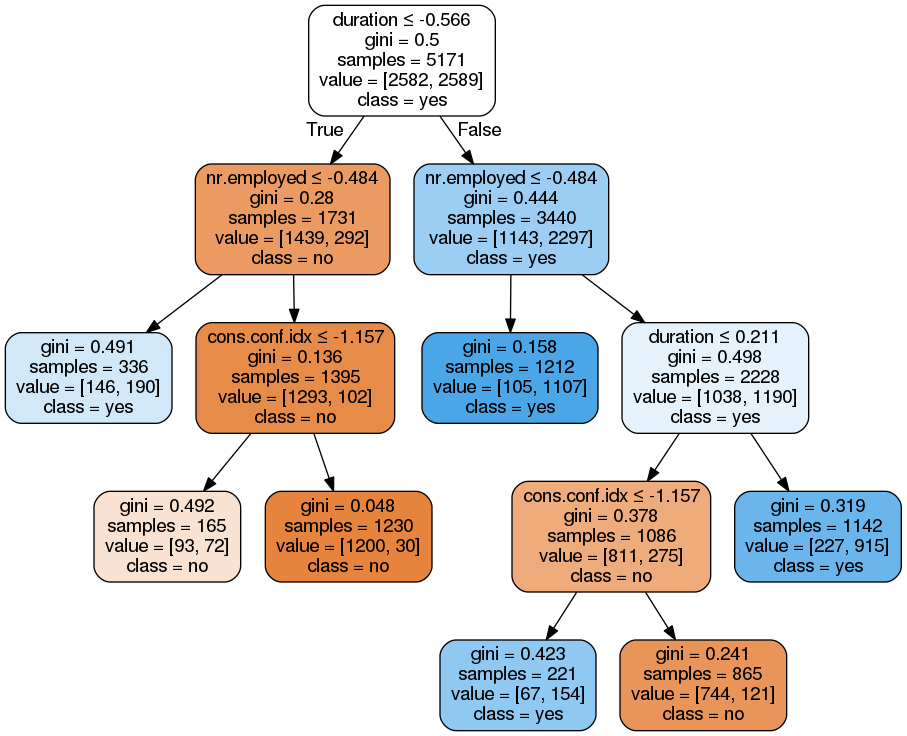

In [21]:
graph = decisionTreeGraph(X_trainS,y_train,X_testS,y_test)
Image(graph.create_png())

<h2> Discussion</h2>

<ul>
<li>l1 regularization after doing scaling works faster.
<li>l2 and l1 regularization have 9 of 10 features in common compared to 7 of 10 in the without scaled values.
<li>The decision tree has no effect of z-score scaling.

In [22]:
# Making pickle file
a = {}
a['X_train'] = X_trainS
a['y_train'] = y_train
a['X_test'] = X_testS
a['y_test'] = y_test
a['target_names'] = ['no','yes']
a['feature_names'] = features
import pickle
pickle.dump(a, open("rgawade.pickle", "wb"))

<h1>Section 5</h1>

In [23]:
clf = LogisticRegression(penalty = 'l2')
clf.fit(X_trainS,y_train)
prob_estimates = clf.predict_proba(X_testS)

In [24]:
weights = clf.coef_[0]
w0 = clf.intercept_
evidence_list = []

In [25]:
# get positive negative evidence
def get_Evidence(featureValues):
    positive_evidence_set = []
    negative_evidence_set = []
    for index in range(0,len(featureValues)):
        #multiply wi with Xi
        multiplyWiXi = weights[index]*featureValues[index] 
        evidence_list.append(multiplyWiXi)
        if multiplyWiXi > 0:
            positive_evidence_set.append(multiplyWiXi)
        else:
            negative_evidence_set.append(multiplyWiXi)
        
    multiplyW0X0 = w0*1
    if multiplyW0X0>0:
        positive_evidence_set.append(multiplyW0X0)
    else:
        negative_evidence_set.append(multiplyW0X0)
    
    total_positive_evidence = sum(positive_evidence_set)
    total_negative_evidence = sum(negative_evidence_set)
    return (total_positive_evidence,total_negative_evidence)        

In [26]:
def gettop_PosNeg_Features(objectID,evidence_list):
    top_features = 3
    top_positive_positions = np.argsort(evidence_list)[-top_features:]
    top_negative_positions = np.argsort(evidence_list)[:top_features]
    #print(np.sort(evidence_list))
    top_pos_features = []
    top_neg_features = []
    feature_nm = np.array(features)
    for i in range(0,3):
        top_pos_features.append({"Feature Name": features[top_positive_positions[i]], "Value":objectID[top_positive_positions[i]]})
        top_neg_features.append({"Feature Name": features[top_negative_positions[i]], "Value":objectID[top_negative_positions[i]]})
    return (top_pos_features,top_neg_features)

In [27]:
def get_Information(objectOG,objectScalar,arrayIndex):
    total_Pos_Evidence,total_Neg_Evidence = get_Evidence(objectScalar)
    print("a) the total positive log-evidence = "+str(total_Pos_Evidence[0]))
    print("b) the total negative log-evidence = "+str(total_Neg_Evidence))
    print("c) Probability Distribution = "+str(prob_estimates[arrayIndex,]))
    top_Pos_Feat,top_Neg_Feat = gettop_PosNeg_Features(objectOG,evidence_list)
    print("d) The top positive features are :")
    print("\tFeature Name \t\t Values")
    for topPF in top_Pos_Feat:
        print("\t"+topPF['Feature Name']+"\t\t"+str(topPF['Value']))
    print("e )The top negative features are :")
    print("\tFeature Name \t\t Values")
    for topNF in top_Neg_Feat:
        print("\t"+topNF['Feature Name']+"\t\t"+str(topNF['Value']))

<h2>1. The most positive object with respect to the probabilities.</h2>

In [28]:
evidence_list = []
positive_yes_objIndex = np.argmax(prob_estimates[:,1])
get_Information(X_test.iloc[positive_yes_objIndex],X_testS[positive_yes_objIndex],positive_yes_objIndex)

a) the total positive log-evidence = 28.1163123875
b) the total negative log-evidence = -2.34023192762
c) Probability Distribution = [  6.39133191e-12   1.00000000e+00]
d) The top positive features are :
	Feature Name 		 Values
	cons.price.idx		94.027
	emp.var.rate		-1.7
	duration		3785.0
e )The top negative features are :
	Feature Name 		 Values
	euribor3m		0.888
	contact_telephone		1.0
	contact_cellular		0.0


<h2>2. The most negative object with respect to the probabilities.</h2>

In [29]:
evidence_list = []
negative_no_objIndex = np.argmax(prob_estimates[:,0])
get_Information(X_test.iloc[negative_no_objIndex],X_testS[negative_no_objIndex],negative_no_objIndex)

a) the total positive log-evidence = 4.0716666048
b) the total negative log-evidence = -10.6414290796
c) Probability Distribution = [ 0.99859983  0.00140017]
d) The top positive features are :
	Feature Name 		 Values
	month_may		0.0
	euribor3m		4.959
	cons.price.idx		94.465
e )The top negative features are :
	Feature Name 		 Values
	emp.var.rate		1.4
	duration		13.0
	campaign		40.0


In [30]:
# find positive evidence for all objects
test_rows = X_testS.shape[0]
# print(test_rows)
# test_rows
all_pos_evidence = []
all_neg_evidence = []

for i in range(0,test_rows):
    pos_evidence,neg_evidence = get_Evidence(X_testS[i])
    all_pos_evidence.append(pos_evidence)
    all_neg_evidence.append(neg_evidence)

<h2>3. The object that has the largest positive evidence.</h2>

In [31]:
evidence_list =[]    
# print(all_pos_evidence)
most_pos_evi_index = np.argmax(all_pos_evidence)
get_Information(X_test.iloc[most_pos_evi_index],X_testS[most_pos_evi_index],most_pos_evi_index)

a) the total positive log-evidence = 28.1163123875
b) the total negative log-evidence = -2.34023192762
c) Probability Distribution = [  6.39133191e-12   1.00000000e+00]
d) The top positive features are :
	Feature Name 		 Values
	cons.price.idx		94.027
	emp.var.rate		-1.7
	duration		3785.0
e )The top negative features are :
	Feature Name 		 Values
	euribor3m		0.888
	contact_telephone		1.0
	contact_cellular		0.0


<h2>4. The object that has the largest (in magnitude) negative evidence.</h2>

In [32]:
evidence_list =[]    
most_neg_evi_index = np.argmax(np.abs(all_neg_evidence))
most_neg_evi_obj = X_test.iloc[most_neg_evi_index]
get_Information(X_test.iloc[most_neg_evi_index],X_testS[most_neg_evi_index],most_neg_evi_index)

a) the total positive log-evidence = 4.0716666048
b) the total negative log-evidence = -10.6414290796
c) Probability Distribution = [ 0.99859983  0.00140017]
d) The top positive features are :
	Feature Name 		 Values
	month_may		0.0
	euribor3m		4.959
	cons.price.idx		94.465
e )The top negative features are :
	Feature Name 		 Values
	emp.var.rate		1.4
	duration		13.0
	campaign		40.0


<h2>5. The most uncertain object (the probabilities are closest to 0.5)</h2>

In [33]:
difference = abs(prob_estimates[:,0])-abs(prob_estimates[:,1])
uncertain_obj_index = np.abs(difference).argmin()
evidence_list =[]
get_Information(X_test.iloc[uncertain_obj_index],X_testS[uncertain_obj_index],uncertain_obj_index)

a) the total positive log-evidence = 3.31463013514
b) the total negative log-evidence = -3.31301277491
c) Probability Distribution = [ 0.49959566  0.50040434]
d) The top positive features are :
	Feature Name 		 Values
	month_oct		1.0
	cons.price.idx		93.798
	euribor3m		5.045
e )The top negative features are :
	Feature Name 		 Values
	emp.var.rate		-0.1
	duration		270.0
	job_blue-collar		1.0
